In [13]:
# load data
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [14]:
# summary of data
feature = boston.data
price = boston.target
print('data size = ', feature.shape)
print('target size = ', price.shape)
print('feature attributes: ', boston.feature_names)
print(boston.DESCR)

data size =  (506, 13)
target size =  (506,)
feature attributes:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employme

In [15]:
# more details of data
import pandas as pd

print(feature.shape)
df_feature = pd.DataFrame(feature, columns = boston.feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target], axis = 1)

(506, 13)


In [16]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 432x288 with 0 Axes>

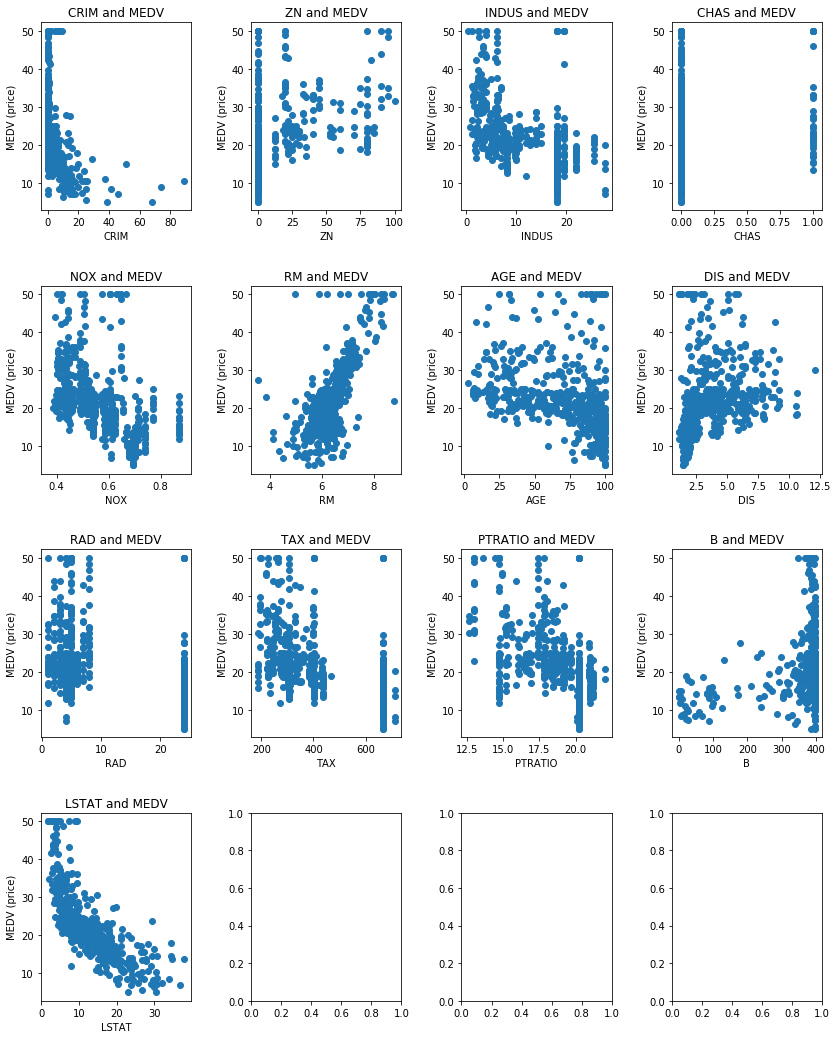

In [18]:
# 2.1 how does each feature relate to the price
import matplotlib.pyplot as plt
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(boston.feature_names.size):
    row, col = i // 4, i % 4   #// = floor
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(boston.feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(boston.feature_names[i])        
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()

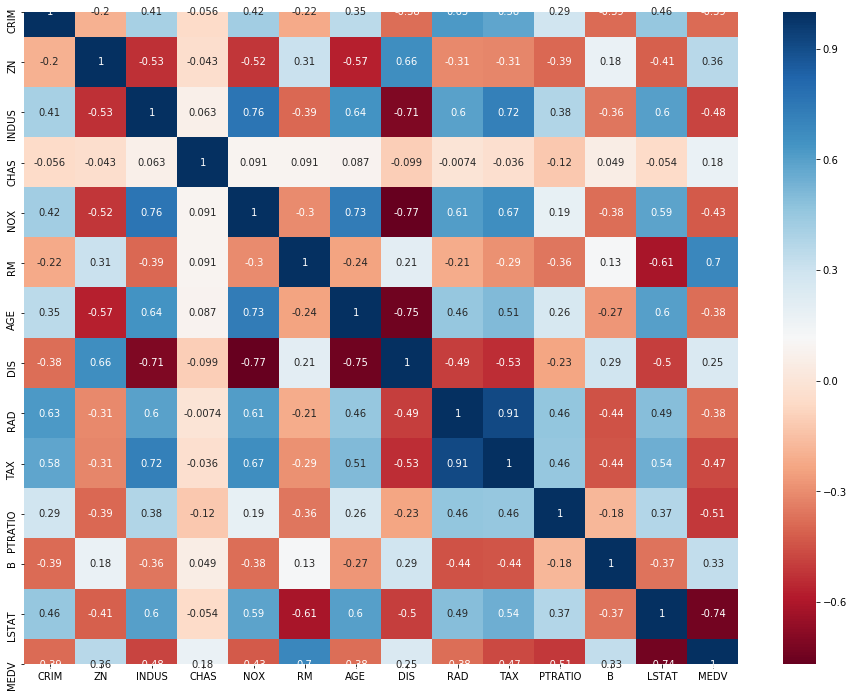

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
# 2.2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 12))
#fig.subplots_adjust(top=.9, bottom=.1)
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
correlation

In [8]:
import numpy as np
# train-test split
#add bias to feature
feature = np.append(feature,np.ones((feature.shape[0],1)),axis = 1)
# print(feature.shape)
feature_names = np.append(boston.feature_names,'BIAS')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

In [9]:
# 2.3 linear regression and ridge regression

def least_square(X, y):
    #TODO
    xT = np.transpose(X)
    xTx = np.matmul(xT,X)
    pseudoInv = np.matmul(np.linalg.inv(xTx),xT)
    theta =  np.matmul(pseudoInv,y)
    return theta

def ridge_reg(X, y, eta):
    #TODO
    xT = np.transpose(X)
    xTx = np.dot(xT,X)
    etaIden = eta*np.identity(xTx.shape[0])
    pseudoInv = np.dot(np.linalg.inv(2*xTx+etaIden),xT)
    theta =  2*np.dot(pseudoInv,y)
    return theta

# apply linear regression
theta = least_square(X_train, y_train)
#df_theta = pd.DataFrame(zip(boston.feature_names, theta),columns=['Feature','Coeff'])
print(theta)

# apply ridge regression
theta_r = ridge_reg(X_train, y_train,14.0 )
df_theta_r = pd.DataFrame(zip(feature_names,theta,theta_r),columns=['Feature','Coeff','Coeff_r'])
df_theta_r

[-1.08934120e-01  5.31327453e-02  2.34402817e-02  2.48890273e+00
 -1.22283083e+01  3.88090530e+00 -8.65043560e-03 -1.39279889e+00
  2.72090186e-01 -1.11667903e-02 -9.34401294e-01  1.05766056e-02
 -5.59850621e-01  3.27561925e+01]


,Feature,Coeff,Coeff_r
0,CRIM,-0.108934,-0.100954
1,ZN,0.053133,0.054583
2,INDUS,0.023440,0.009363
3,CHAS,2.488903,2.251554
4,NOX,-12.228308,0.251289
5,RM,3.880905,5.521337
6,AGE,-0.008650,-0.010759
7,DIS,-1.392799,-0.934018
8,RAD,0.272090,0.172423
9,TAX,-0.011167,-0.009328


In [10]:
# 2.4 evaluation
def pred_fn(X, theta):
    pred = np.matmul(X,theta)
    return pred

def root_mean_square_error(pred, y):
    diff = pred - y
    rmse = np.sqrt(np.dot(diff.transpose(),diff)/len(diff))
    return rmse

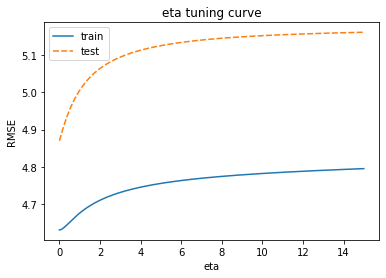

In [11]:
# Eta tuning
etas = np.arange(0,15.0,0.01)
ridge_train_rmse_list = list()
ridge_test_rmse_list = list()
theta_r_list= list()

for eta in etas:
    the_r = ridge_reg(X_train, y_train, eta)
    ridge_train_rmse_list.append(root_mean_square_error(pred_fn(X_train, the_r),y_train))
    ridge_test_rmse_list.append(root_mean_square_error(pred_fn(X_test, the_r),y_test))
    theta_r_list.append(the_r)

fig,ax = plt.subplots()
wide_df = pd.DataFrame(zip(ridge_train_rmse_list,ridge_test_rmse_list), etas, ['train','test'])
ax.set_title("eta tuning curve")
ax.set_xlabel('eta')        
ax.set_ylabel('RMSE')
ax = sns.lineplot(data=wide_df)
plt.show()


In [12]:
linear_train_rmse = root_mean_square_error(pred_fn(X_train, theta),y_train)
linear_test_rmse = root_mean_square_error(pred_fn(X_test, theta),y_test)
ridge_train_rmse = root_mean_square_error(pred_fn(X_train, theta_r),y_train)
ridge_test_rmse = root_mean_square_error(pred_fn(X_test, theta_r),y_test)
print('linear_train_rmse:', linear_train_rmse)
print('linear_test_rmse:', linear_test_rmse)
print('ridge_train_rmse:', ridge_train_rmse)
print('ridge_test_rmse:', ridge_test_rmse)

linear_train_rmse: 4.63142853427834
linear_test_rmse: 4.869926172571175
ridge_train_rmse: 4.793286773321472
ridge_test_rmse: 5.159046200395644


In [13]:
#extract top 3 features columns
topThreeFeatNames = np.array(['RM','PTRATIO','LSTAT','BIAS'])
topThreeFeat = feature[:,[5,10,12,13]]
df_feature = pd.DataFrame(topThreeFeat, columns = topThreeFeatNames)
print(df_feature.shape)
df_feature.head()

(506, 4)


,RM,PTRATIO,LSTAT,BIAS
0,6.575,15.3,4.98,1.0
1,6.421,17.8,9.14,1.0
2,7.185,17.8,4.03,1.0
3,6.998,18.7,2.94,1.0
4,7.147,18.7,5.33,1.0


In [14]:
# 2.5 linear models of top-3 features
X_train, X_test, y_train, y_test = train_test_split(topThreeFeat, price, test_size=0.3, random_state=8)

# linear regression using top-3 features
top_theta = least_square(X_train,y_train)
# ridge regression using top-3 features
top_theta_r = ridge_reg(X_train, y_train,14.0)

df_top_theta = pd.DataFrame(zip(topThreeFeatNames,top_theta,top_theta_r),columns=['Feature','Coeff','Coeff_r'])
display(df_top_theta)

linear_train_rmse = root_mean_square_error(pred_fn(X_train, top_theta),y_train)
linear_test_rmse = root_mean_square_error(pred_fn(X_test, top_theta),y_test)
ridge_train_rmse = root_mean_square_error(pred_fn(X_train, top_theta_r),y_train)
ridge_test_rmse = root_mean_square_error(pred_fn(X_test, top_theta_r),y_test)
print('linear_train_rmse:', linear_train_rmse)
print('linear_test_rmse:', linear_test_rmse)
print('ridge_train_rmse:', ridge_train_rmse)
print('ridge_test_rmse:', ridge_test_rmse)

,Feature,Coeff,Coeff_r
0,RM,4.380279,5.952663
1,PTRATIO,-1.012630,-0.620868
2,LSTAT,-0.624712,-0.559416
3,BIAS,21.660211,3.607915


linear_train_rmse: 5.121813241883696
linear_test_rmse: 5.4610116963629975
ridge_train_rmse: 5.228893258274675
ridge_test_rmse: 5.453435658034387


In [15]:
### 2f) feature engineering 
# feature augmentation -> outlier -> normalise -> train 
orig_feats = boston.data
feat_eng_names = np.array(['NOX_INDUS','CRIM_B','TAX_ZN','TAX_PTRATIO','RAD_TAX_DIS','BIAS'])

#mixing features
nox_indus = np.reshape(np.multiply(orig_feats[:,4],orig_feats[:,2]),(-1, 1))
crim_b = np.reshape(np.multiply(orig_feats[:,0],orig_feats[:,11]),(-1, 1))
tax_zn = np.reshape(np.multiply(orig_feats[:,9],orig_feats[:,1]),(-1, 1))
tax_ptratio = np.reshape(np.multiply(orig_feats[:,9],orig_feats[:,10]),(-1, 1))
rad_tax_dis = np.reshape(np.multiply(np.multiply(orig_feats[:,8],orig_feats[:,9]),orig_feats[:,7]),(-1, 1))
bias = np.ones((orig_feats.shape[0],1))

#combine new features with original features
new_feat_cols = np.append(boston.feature_names,feat_eng_names)
new_feats = np.concatenate([orig_feats,nox_indus,crim_b,tax_zn,tax_ptratio,rad_tax_dis,bias],axis=1)
df_newfeature = pd.DataFrame(new_feats, columns = new_feat_cols)
display(df_newfeature.head())
print(df_newfeature.shape)
print(new_feats.shape[1])
col_norm = new_feats.shape[1] -1
#df_newfeature['TAX_ZN'].value_counts()

#Normalise using scikit learn
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(new_feats[:,range(col_norm)])
feat_norm_std = std_scale.transform(new_feats[:,range(col_norm)])
print(feat_norm_std.shape)
print(bias.shape)
feat_norm_std = np.concatenate([feat_norm_std, bias],axis=1)
df_feat_norm_std = pd.DataFrame(feat_norm_std, columns = new_feat_cols)
display(df_feat_norm_std.head())

minmax_scale = preprocessing.MinMaxScaler().fit(df_newfeature[new_feat_cols])
df_minmax = minmax_scale.transform(df_newfeature[new_feat_cols])

#transform back to feature numpy array


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,NOX_INDUS,CRIM_B,TAX_ZN,TAX_PTRATIO,RAD_TAX_DIS,BIAS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.24278,2.508408,5328.0,4528.8,1210.6400,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,3.31583,10.839339,0.0,4307.6,2404.0764,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,3.31583,10.720331,0.0,4307.6,2404.0764,1.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.99844,12.774173,0.0,4151.4,4037.4252,1.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.99844,27.405945,0.0,4151.4,4037.4252,1.0


(506, 19)
19
(506, 18)
(506, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,NOX_INDUS,CRIM_B,TAX_ZN,TAX_PTRATIO,RAD_TAX_DIS,BIAS
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,-1.097810,-0.370183,0.266884,-0.851123,-0.891115,1.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.687058,-0.367050,-0.472582,-0.910453,-0.801248,1.0
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,-0.687058,-0.367095,-0.472582,-0.910453,-0.801248,1.0
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-1.146223,-0.366323,-0.472582,-0.952349,-0.678254,1.0
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-1.146223,-0.360822,-0.472582,-0.952349,-0.678254,1.0


In [20]:
# Split data into 0.3 test, 0.14 val, 0.56 train
X_train, X_test, y_train, y_test = train_test_split(feat_norm_std, price, test_size=0.2, random_state=8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=8)

In [17]:
#train
top_theta = least_square(X_train,y_train)
#new_theta_r = ridge_reg(X_train, y_train,14.5)

eta: 10
ridge_train_rmse: 4.4704531035096196
ridge_val_rmse: 5.528012945624028
eta: 11
ridge_train_rmse: 4.475816230656499
ridge_val_rmse: 5.536989613735376
eta: 12
ridge_train_rmse: 4.481410411230798
ridge_val_rmse: 5.5462220453059174
eta: 13
ridge_train_rmse: 4.487230462899262
ridge_val_rmse: 5.555691872289966
eta: 14
ridge_train_rmse: 4.493270907010951
ridge_val_rmse: 5.565383073317208
eta: 15
ridge_train_rmse: 4.499526332544865
ridge_val_rmse: 5.575281649067082
eta: 16
ridge_train_rmse: 4.5059915681666
ridge_val_rmse: 5.585375328952237
eta: 17
ridge_train_rmse: 4.512661752083874
ridge_val_rmse: 5.5956533151468575
eta: 18
ridge_train_rmse: 4.5195323478348115
ridge_val_rmse: 5.606106063177402
eta: 19
ridge_train_rmse: 4.526599132330956
ridge_val_rmse: 5.616725095627115
eta: 20
ridge_train_rmse: 4.533858170687371
ridge_val_rmse: 5.627502844719521
eta: 21
ridge_train_rmse: 4.541305785854126
ridge_val_rmse: 5.638432519586751
eta: 22
ridge_train_rmse: 4.54893852740074
ridge_val_rmse: 5.6

eta: 410
ridge_train_rmse: 10.10344515029242
ridge_val_rmse: 11.042209805416116
eta: 411
ridge_train_rmse: 10.11540695248818
ridge_val_rmse: 11.053066253824632
eta: 412
ridge_train_rmse: 10.127350162014393
ridge_val_rmse: 11.063904683267381
eta: 413
ridge_train_rmse: 10.139274809349844
ridge_val_rmse: 11.07472512696584
eta: 414
ridge_train_rmse: 10.151180925034245
ridge_val_rmse: 11.085527618156895
eta: 415
ridge_train_rmse: 10.163068539666229
ridge_val_rmse: 11.09631219009147
eta: 416
ridge_train_rmse: 10.174937683901327
ridge_val_rmse: 11.10707887603311
eta: 417
ridge_train_rmse: 10.186788388449997
ridge_val_rmse: 11.117827709256625
eta: 418
ridge_train_rmse: 10.198620684075722
ridge_val_rmse: 11.12855872304679
eta: 419
ridge_train_rmse: 10.210434601593079
ridge_val_rmse: 11.139271950696992
eta: 420
ridge_train_rmse: 10.222230171865885
ridge_val_rmse: 11.149967425507972
eta: 421
ridge_train_rmse: 10.234007425805318
ridge_val_rmse: 11.160645180786515
eta: 422
ridge_train_rmse: 10.2457

eta: 820
ridge_train_rmse: 13.781491300530746
ridge_val_rmse: 14.322609169017687
eta: 821
ridge_train_rmse: 13.788158322819628
ridge_val_rmse: 14.328436248185016
eta: 822
ridge_train_rmse: 13.79481690387388
ridge_val_rmse: 14.334255445531623
eta: 823
ridge_train_rmse: 13.801467059387038
ridge_val_rmse: 14.34006677616126
eta: 824
ridge_train_rmse: 13.808108805016346
ridge_val_rmse: 14.345870255141778
eta: 825
ridge_train_rmse: 13.814742156382712
ridge_val_rmse: 14.351665897505082
eta: 826
ridge_train_rmse: 13.821367129070921
ridge_val_rmse: 14.357453718247376
eta: 827
ridge_train_rmse: 13.827983738629658
ridge_val_rmse: 14.363233732329146
eta: 828
ridge_train_rmse: 13.834592000571606
ridge_val_rmse: 14.369005954675295
eta: 829
ridge_train_rmse: 13.841191930373554
ridge_val_rmse: 14.374770400175247
eta: 830
ridge_train_rmse: 13.84778354347646
ridge_val_rmse: 14.38052708368301
eta: 831
ridge_train_rmse: 13.854366855285559
ridge_val_rmse: 14.38627602001728
eta: 832
ridge_train_rmse: 13.860

eta: 1235
ridge_train_rmse: 15.972301777842606
ridge_val_rmse: 16.206580196429375
eta: 1236
ridge_train_rmse: 15.976476331806746
ridge_val_rmse: 16.210102800957095
eta: 1237
ridge_train_rmse: 15.980646691701764
ridge_val_rmse: 16.213621574172542
eta: 1238
ridge_train_rmse: 15.984812863896327
ridge_val_rmse: 16.21713652208645
eta: 1239
ridge_train_rmse: 15.988974854746397
ridge_val_rmse: 16.220647650697334
eta: 1240
ridge_train_rmse: 15.993132670595248
ridge_val_rmse: 16.224154965991502
eta: 1241
ridge_train_rmse: 15.99728631777351
ridge_val_rmse: 16.2276584739431
eta: 1242
ridge_train_rmse: 16.001435802599214
ridge_val_rmse: 16.23115818051416
eta: 1243
ridge_train_rmse: 16.005581131377777
ridge_val_rmse: 16.234654091654583
eta: 1244
ridge_train_rmse: 16.009722310402093
ridge_val_rmse: 16.238146213302215
eta: 1245
ridge_train_rmse: 16.013859345952515
ridge_val_rmse: 16.24163455138285
eta: 1246
ridge_train_rmse: 16.01799224429689
ridge_val_rmse: 16.245119111810265
eta: 1247
ridge_train_r

eta: 1528
ridge_train_rmse: 17.03910828560268
ridge_val_rmse: 17.096532278696202
eta: 1529
ridge_train_rmse: 17.04228166070814
ridge_val_rmse: 17.09914648988693
eta: 1530
ridge_train_rmse: 17.04545227018789
ridge_val_rmse: 17.101758211340623
eta: 1531
ridge_train_rmse: 17.04862011771595
ridge_val_rmse: 17.104367446488144
eta: 1532
ridge_train_rmse: 17.051785206959888
ridge_val_rmse: 17.1069741987542
eta: 1533
ridge_train_rmse: 17.054947541580795
ridge_val_rmse: 17.10957847155734
eta: 1534
ridge_train_rmse: 17.05810712523334
ridge_val_rmse: 17.11218026830999
eta: 1535
ridge_train_rmse: 17.061263961565736
ridge_val_rmse: 17.114779592418447
eta: 1536
ridge_train_rmse: 17.064418054219793
ridge_val_rmse: 17.11737644728289
eta: 1537
ridge_train_rmse: 17.06756940683092
ridge_val_rmse: 17.11997083629742
eta: 1538
ridge_train_rmse: 17.070718023028125
ridge_val_rmse: 17.122562762850038
eta: 1539
ridge_train_rmse: 17.073863906434042
ridge_val_rmse: 17.12515223032268
eta: 1540
ridge_train_rmse: 17

ridge_train_rmse: 18.25175008256842
ridge_val_rmse: 18.078571266450254
eta: 1987
ridge_train_rmse: 18.253958948450343
ridge_val_rmse: 18.080326045009656
eta: 1988
ridge_train_rmse: 18.25616622646509
ridge_val_rmse: 18.082079426197346
eta: 1989
ridge_train_rmse: 18.25837191836769
ridge_val_rmse: 18.083831411627163
eta: 1990
ridge_train_rmse: 18.26057602591059
ridge_val_rmse: 18.085582002910524
eta: 1991
ridge_train_rmse: 18.26277855084364
ridge_val_rmse: 18.087331201656408
eta: 1992
ridge_train_rmse: 18.264979494914133
ridge_val_rmse: 18.08907900947138
eta: 1993
ridge_train_rmse: 18.267178859866753
ridge_val_rmse: 18.090825427959565
eta: 1994
ridge_train_rmse: 18.269376647443636
ridge_val_rmse: 18.09257045872269
eta: 1995
ridge_train_rmse: 18.271572859384342
ridge_val_rmse: 18.094314103360052
eta: 1996
ridge_train_rmse: 18.273767497425872
ridge_val_rmse: 18.096056363468556
eta: 1997
ridge_train_rmse: 18.27596056330267
ridge_val_rmse: 18.097797240642688
eta: 1998
ridge_train_rmse: 18.278

eta: 2391
ridge_train_rmse: 19.033231287707725
ridge_val_rmse: 18.690333762903542
eta: 2392
ridge_train_rmse: 19.034916642437206
ridge_val_rmse: 18.691632121253853
eta: 2393
ridge_train_rmse: 19.036600950891486
ridge_val_rmse: 18.692929577266426
eta: 2394
ridge_train_rmse: 19.03828421407478
ridge_val_rmse: 18.694226131852467
eta: 2395
ridge_train_rmse: 19.039966432990013
ridge_val_rmse: 18.695521785921983
eta: 2396
ridge_train_rmse: 19.04164760863881
ridge_val_rmse: 18.69681654038377
eta: 2397
ridge_train_rmse: 19.043327742021532
ridge_val_rmse: 18.698110396145445
eta: 2398
ridge_train_rmse: 19.045006834137226
ridge_val_rmse: 18.699403354113414
eta: 2399
ridge_train_rmse: 19.046684885983677
ridge_val_rmse: 18.700695415192897
eta: 2400
ridge_train_rmse: 19.048361898557374
ridge_val_rmse: 18.701986580287908
eta: 2401
ridge_train_rmse: 19.05003787285353
ridge_val_rmse: 18.703276850301286
eta: 2402
ridge_train_rmse: 19.051712809866086
ridge_val_rmse: 18.70456622613467
eta: 2403
ridge_train

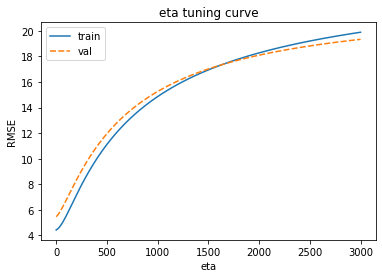

In [40]:
# Eta tuning
etas = np.arange(1,3000,1)
ridge_train_rmse_list = list()
ridge_val_rmse_list = list()
theta_r_list= list()
epsilon = 1e-2
ind = 0
new_theta_r=0

for i, eta in enumerate(etas):
    the_r = ridge_reg(X_train, y_train, eta)
    ridge_train_rmse_list.append(root_mean_square_error(pred_fn(X_train, the_r),y_train))
    ridge_val_rmse_list.append(root_mean_square_error(pred_fn(X_val, the_r),y_val))
    theta_r_list.append(the_r)
    
    if len(ridge_val_rmse_list)>10 and ridge_val_rmse_list[-1] - ridge_val_rmse_list[-10] >= epsilon:
        new_theta_r = theta_r_list[-2]
        print("eta:", etas[i-1])
        ind = i
        print('ridge_train_rmse:', ridge_train_rmse_list[-2])
        print('ridge_val_rmse:', ridge_val_rmse_list[-2])
    
fig,ax = plt.subplots()
wide_df = pd.DataFrame(zip(ridge_train_rmse_list,ridge_val_rmse_list), etas, ['train','val'])
# display(wide_df)
ax.set_title("eta tuning curve")
ax.set_xlabel('eta')        
ax.set_ylabel('RMSE')
ax = sns.lineplot(data=wide_df)
plt.show()

In [39]:
# results
linear_train_rmse = root_mean_square_error(pred_fn(X_train, top_theta),y_train)
linear_test_rmse = root_mean_square_error(pred_fn(X_test, top_theta),y_test)
ridge_train_rmse = root_mean_square_error(pred_fn(X_train, new_theta_r),y_train)
ridge_test_rmse = root_mean_square_error(pred_fn(X_test, new_theta_r),y_test)
print('linear_train_rmse:', linear_train_rmse)
print('linear_test_rmse:', linear_test_rmse)
print('ridge_train_rmse:', ridge_train_rmse)
print('ridge_test_rmse:', ridge_test_rmse)

linear_train_rmse: 4.484589840907343
linear_test_rmse: 4.672554334383941
ridge_train_rmse: 18.278152058746628
ridge_test_rmse: 17.3241220530397
